In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np
import datetime

list_fechas = list(map(lambda x: x.strftime("%m-%d"),
                       [ datetime.datetime(2022,3,1) + datetime.timedelta(x) for x in range(275) ]))

df_all = pd.read_excel("output_graphs.xlsx")

mediana_ive = df_all["IVE-SINAE BÁSICA 2022"].median()

df_all

,ID institucion,ID curso,Grupo,ID_RBD,DS_REGION_ESTABLE,DS_PROVINCIA_ESTABLE,DS_COMUNA_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,IVE-SINAE BÁSICA 2022,...,11-21,11-22,11-23,11-24,11-25,11-26,11-27,11-28,11-29,11-30
0,3422,210379,simple,8514,Región Metropolitana de Santiago,Santiago,Independencia,Municipal DAEM,Urbano,0.703642,...,1,1,1,1,1,-1,-1,1,1,1
1,3422,210379,simple,8514,Región Metropolitana de Santiago,Santiago,Independencia,Municipal DAEM,Urbano,0.703642,...,1,1,1,1,1,-1,-1,1,1,1
2,3422,210379,simple,8514,Región Metropolitana de Santiago,Santiago,Independencia,Municipal DAEM,Urbano,0.703642,...,1,1,1,1,1,-1,-1,1,1,1
3,3422,210379,simple,8514,Región Metropolitana de Santiago,Santiago,Independencia,Municipal DAEM,Urbano,0.703642,...,0,1,1,1,1,-1,-1,1,1,1
4,3422,210379,simple,8514,Región Metropolitana de Santiago,Santiago,Independencia,Municipal DAEM,Urbano,0.703642,...,1,1,1,1,1,-1,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,3871,228010,individual,10135,Región Metropolitana de Santiago,Santiago,Pudahuel,Servicio Local de Educación(SLE),Rural,0.866109,...,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3
3059,3871,228010,individual,10135,Región Metropolitana de Santiago,Santiago,Pudahuel,Servicio Local de Educación(SLE),Rural,0.866109,...,1,1,0,1,1,-1,-1,1,1,1
3060,3871,228010,individual,10135,Región Metropolitana de Santiago,Santiago,Pudahuel,Servicio Local de Educación(SLE),Rural,0.866109,...,1,1,1,1,0,-1,-1,0,0,0
3061,3871,228010,individual,10135,Región Metropolitana de Santiago,Santiago,Pudahuel,Servicio Local de Educación(SLE),Rural,0.866109,...,1,1,1,1,1,-1,-1,1,1,1


In [2]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Columns: 300 entries, ID institucion to 11-30
dtypes: float64(1), int64(284), object(15)
memory usage: 7.0+ MB


# Gráficos

In [3]:
sns.set_theme(style="whitegrid")

Obtenemos la proporción según el genero

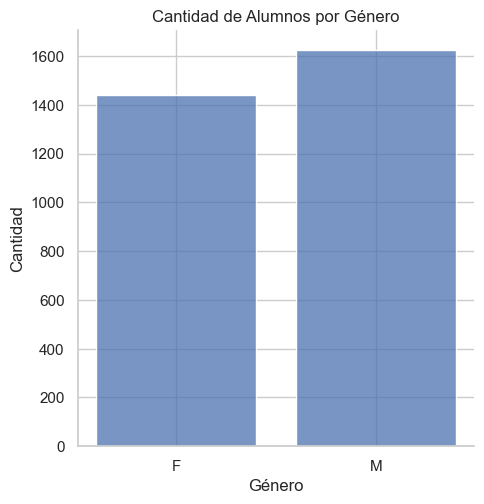

In [4]:
sns.displot(data=df_all,
            x = "genero",
            shrink = .8
            )
plt.title("Cantidad de Alumnos por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

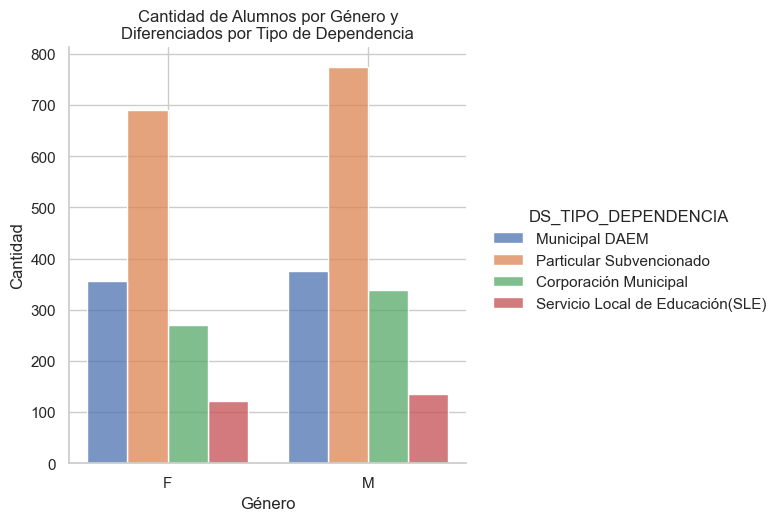

In [5]:
sns.displot(data=df_all,
            x = "genero",
            shrink = .8,
            hue= "DS_TIPO_DEPENDENCIA",
            multiple ="dodge" 
            )
plt.title("Cantidad de Alumnos por Género y\nDiferenciados por Tipo de Dependencia")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

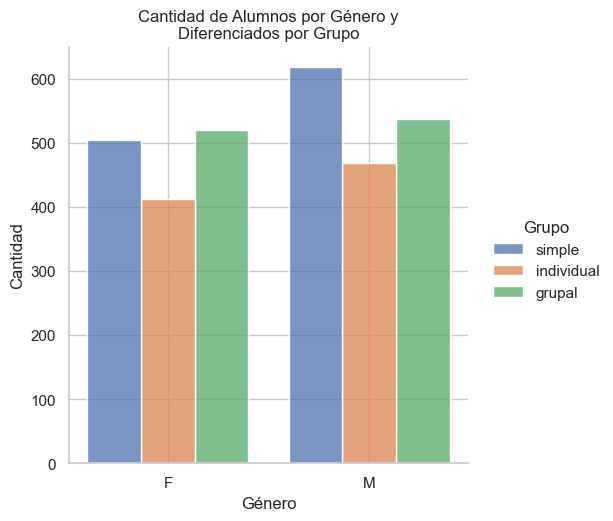

In [6]:
sns.displot(data=df_all,
            x = "genero",
            shrink = .8,
            hue= "Grupo",
            multiple ="dodge" 
            )
plt.title("Cantidad de Alumnos por Género y\nDiferenciados por Grupo")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

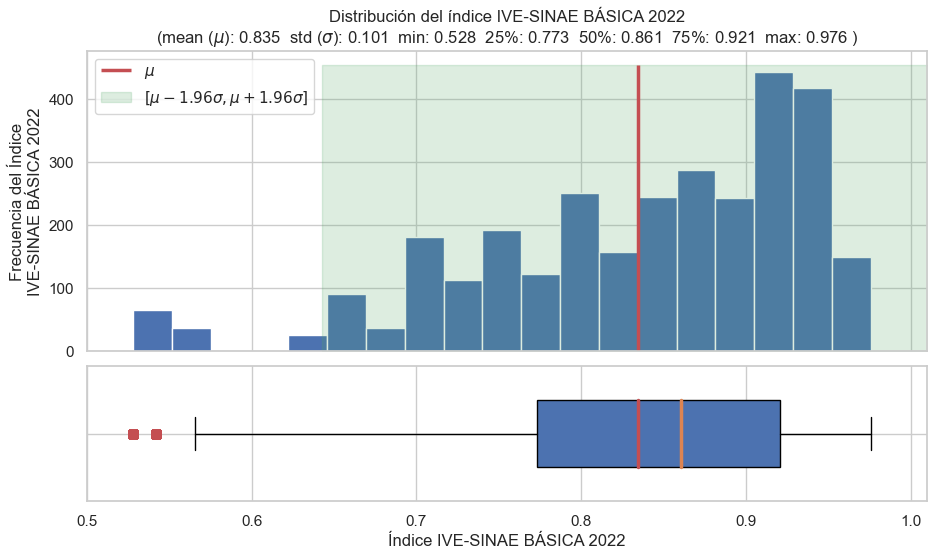

In [7]:
fig, ax = plt.subplots(nrows=2,
                       figsize=(12,5),
                       sharex=True)
aux = df_all["IVE-SINAE BÁSICA 2022"]
metadata = aux.describe()

prom = metadata["mean"]
des = metadata["std"]
mediana = metadata["50%"]


str_stats = []
for key,value in metadata[metadata.index[1:].to_list()].to_dict().items():
    if key == "mean":
        str_stats.append(f"{key} ($\mu$):")
    elif key == "std":
        str_stats.append(f"{key} ($\sigma$):")
    else:
        str_stats.append(f"{key}:")
    str_stats.append(f"{round(value,3)} ")

str_stats = " ".join(str_stats)

ax[0].set_title(f"Distribución del índice IVE-SINAE BÁSICA 2022\n({str_stats})")
ax[0].set_ylabel("Frecuencia del Índice\nIVE-SINAE BÁSICA 2022")
ax[0].set_position([0.2,0.4,0.7,0.6])
ax[0].set_xlim(left=0.5,right=1.01)
ax[1].set_xlabel("Índice IVE-SINAE BÁSICA 2022")
ax[1].set_position([0.2,0.1,0.7,0.27])

w, b = np.histogram(aux,bins="scott")

top = max(w) +10

ax[0].hist(x=b[:-1],bins=b,weights=w)
ax[0].vlines(x=prom,
             ymin=0,
             ymax=top,
             color="r",
             label=f"$\mu$",
             linewidth=2.5)

ax[0].fill_betweenx(y=range(top+1),
                    x1=prom-1.9*des,
                    x2=prom+1.9*des,
                    color="g",
                    alpha=0.2,
                    label=f"$[\mu- 1.96\sigma, \mu + 1.96\sigma]$")


ax[0].legend(loc='upper left')

ax[1].boxplot(aux,
              vert=False,
              sym="rs",
              widths=0.5,
              patch_artist=True,
              medianprops= dict(linewidth=2.5),
              showmeans=True,
              meanline=True,
              meanprops= dict(linestyle="-",linewidth=2.5,color="r"),
              labels=[""])

plt.show()

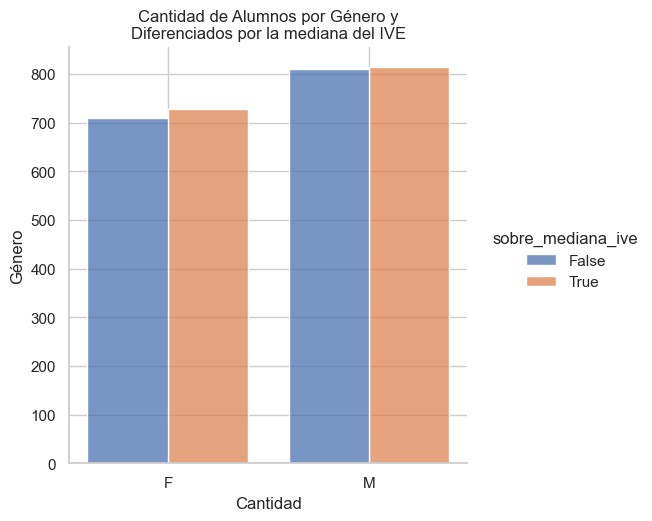

In [8]:
mediana = df_all["IVE-SINAE BÁSICA 2022"].median()

sns.displot(data=df_all.assign(sobre_mediana_ive=lambda x: x["IVE-SINAE BÁSICA 2022"].map(lambda y: y>=mediana_ive) ),
            x = "genero",
            shrink = .8,
            hue= "sobre_mediana_ive",
            multiple ="dodge" 
            )
plt.title("Cantidad de Alumnos por Género y\nDiferenciados por la mediana del IVE")
plt.ylabel("Género")
plt.xlabel("Cantidad")
plt.show()

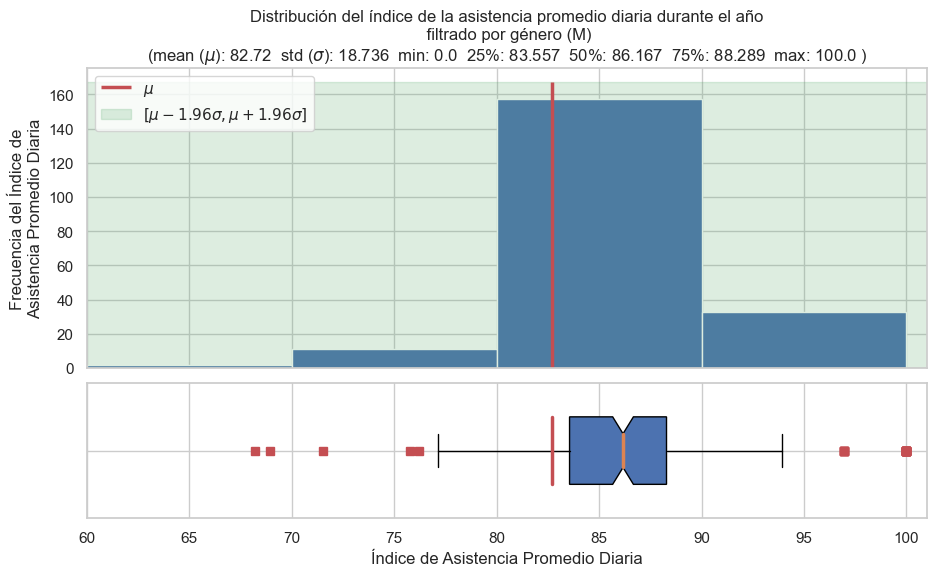

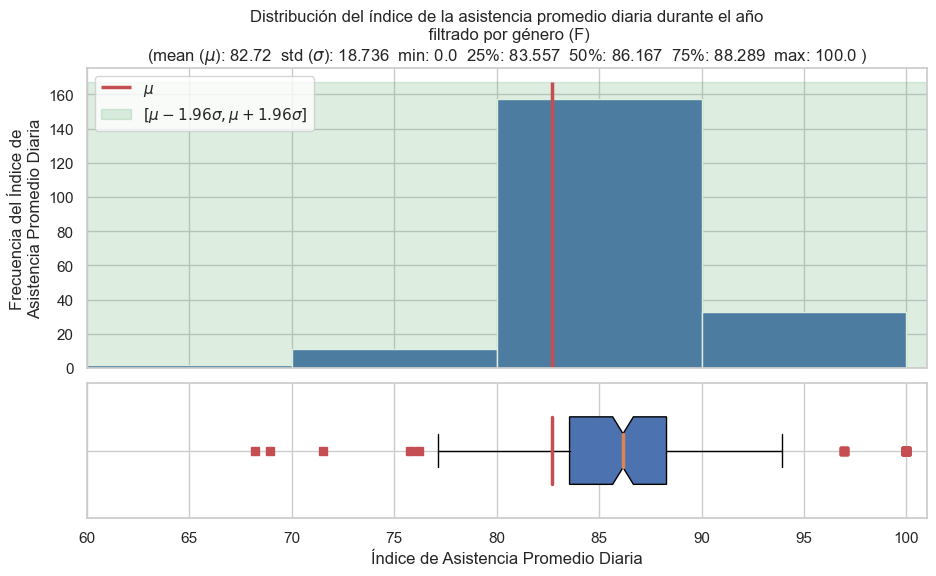

In [9]:
for cat in ["M","F"]:

    fig, ax = plt.subplots(nrows=2,
                           figsize=(12,5),
                           sharex=True)



    aux = df_all[df_all[list_fechas]>=0][list_fechas].describe().T
    aux = aux[aux["count"]>0]
    aux = aux["mean"]*100
    metadata = aux.describe()

    prom = metadata["mean"]
    des = metadata["std"]
    mediana = metadata["50%"]


    str_stats = []
    for key,value in metadata[list(metadata.index[1:])].to_dict().items():
        if key == "mean":
            str_stats.append(f"{key} ($\mu$):")
        elif key == "std":
            str_stats.append(f"{key} ($\sigma$):")
        else:
            str_stats.append(f"{key}:")
        str_stats.append(f"{round(value,3)} ")

    str_stats = " ".join(str_stats)

    ax[0].set_title(f"Distribución del índice de la asistencia promedio diaria durante el año\n filtrado por género ({cat})\n({str_stats})")
    ax[0].set_ylabel("Frecuencia del Índice de\nAsistencia Promedio Diaria")
    ax[0].set_position([0.2,0.4,0.7,0.6])
    ax[1].set_xlabel("Índice de Asistencia Promedio Diaria")
    ax[1].set_position([0.2,0.1,0.7,0.27])
    ax[0].set_xlim(left=60,right=101)

    w, b = np.histogram(aux,bins="scott")

    top = max(w) +10

    ax[0].hist(x=b[:-1],bins=b,weights=w)
    ax[0].vlines(x=prom,
                 ymin=0,
                 ymax=top,
                 color="r",
                 label=f"$\mu$",
                 linewidth=2.5)

    ax[0].fill_betweenx(y=range(top+1),
                        x1=prom-1.9*des,
                        x2=prom+1.9*des,
                        color="g",
                        alpha=0.2,
                        label=f"$[\mu- 1.96\sigma, \mu + 1.96\sigma]$")


    ax[0].legend(loc='upper left')

    ax[1].boxplot(aux,
                  notch=True,
                  vert=False,
                  sym="rs",
                  widths=0.5,
                  patch_artist=True,
                  medianprops= dict(linewidth=2.5),
                  showmeans=True,
                  meanline=True,
                  meanprops= dict(linestyle="-",linewidth=2.5,color="r"),
                  labels=[""])

    plt.show()

In [29]:
aux = df_all.assign(sobre_mediana_ive=lambda x: x["IVE-SINAE BÁSICA 2022"]>=mediana_ive)
aux = aux[(aux["sobre_mediana_ive"]==False)][list_fechas]
aux[(aux[list_fechas]>=0)].describe().T

,count,mean,std,min,25%,50%,75%,max
03-01,33.0,0.878788,0.331434,0.0,1.0,1.0,1.0,1.0
03-02,954.0,0.791405,0.406518,0.0,1.0,1.0,1.0,1.0
03-03,1170.0,0.778632,0.415345,0.0,1.0,1.0,1.0,1.0
03-04,1203.0,0.770574,0.420639,0.0,1.0,1.0,1.0,1.0
03-05,33.0,0.878788,0.331434,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
11-26,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
11-27,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
11-28,987.0,0.880446,0.324604,0.0,1.0,1.0,1.0,1.0
11-29,987.0,0.876393,0.329299,0.0,1.0,1.0,1.0,1.0


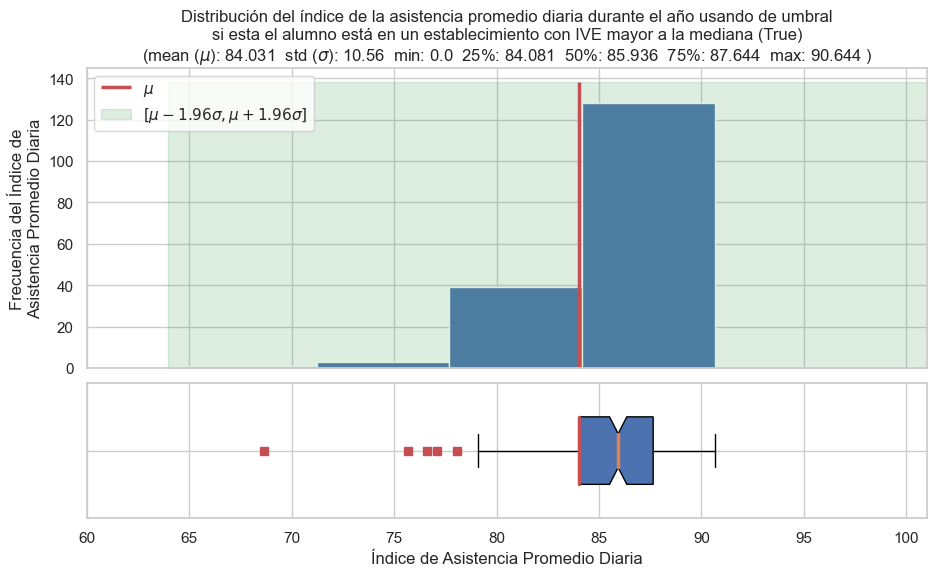

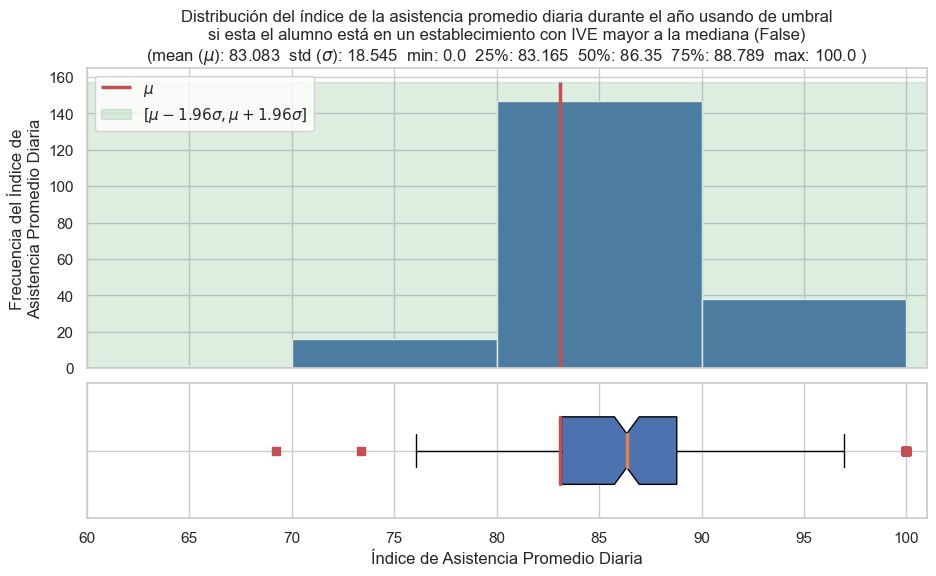

In [32]:
for cat in [True,False]:

    fig, ax = plt.subplots(nrows=2,
                           figsize=(12,5),
                           sharex=True) 

    aux = df_all.assign(sobre_mediana_ive=lambda x: x["IVE-SINAE BÁSICA 2022"]>=mediana_ive)
    aux = aux[(aux["sobre_mediana_ive"]==cat)][list_fechas]
    aux = aux[(aux[list_fechas]>=0)].describe().T
    aux = aux[aux["count"]>0]
    aux = aux["mean"]*100
    metadata = aux.describe()

    prom = metadata["mean"]
    des = metadata["std"]
    mediana = metadata["50%"]

    str_stats = []
    for key,value in metadata[list(metadata.index[1:])].to_dict().items():
        if key == "mean":
            str_stats.append(f"{key} ($\mu$):")
        elif key == "std":
            str_stats.append(f"{key} ($\sigma$):")
        else:
            str_stats.append(f"{key}:")
        str_stats.append(f"{round(value,3)} ")

    str_stats = " ".join(str_stats)

    ax[0].set_title(f"Distribución del índice de la asistencia promedio diaria durante el año usando de umbral\nsi esta el alumno está en un establecimiento con IVE mayor a la mediana ({cat})\n({str_stats})")
    ax[0].set_ylabel("Frecuencia del Índice de\nAsistencia Promedio Diaria")
    ax[0].set_position([0.2,0.4,0.7,0.6])
    ax[1].set_xlabel("Índice de Asistencia Promedio Diaria")
    ax[1].set_position([0.2,0.1,0.7,0.27])
    ax[0].set_xlim(left=60,right=101)

    w, b = np.histogram(aux,bins="scott")

    top = max(w) +10

    ax[0].hist(x=b[:-1],bins=b,weights=w)
    ax[0].vlines(x=prom,
                 ymin=0,
                 ymax=top,
                 color="r",
                 label=f"$\mu$",
                 linewidth=2.5)

    ax[0].fill_betweenx(y=range(top+1),
                        x1=prom-1.9*des,
                        x2=prom+1.9*des,
                        color="g",
                        alpha=0.2,
                        label=f"$[\mu- 1.96\sigma, \mu + 1.96\sigma]$")


    ax[0].legend(loc='upper left')

    ax[1].boxplot(aux,
                  notch=True,
                  vert=False,
                  sym="rs",
                  widths=0.5,
                  patch_artist=True,
                  medianprops= dict(linewidth=2.5),
                  showmeans=True,
                  meanline=True,
                  meanprops= dict(linestyle="-",linewidth=2.5,color="r"),
                  labels=[""])

    plt.show()

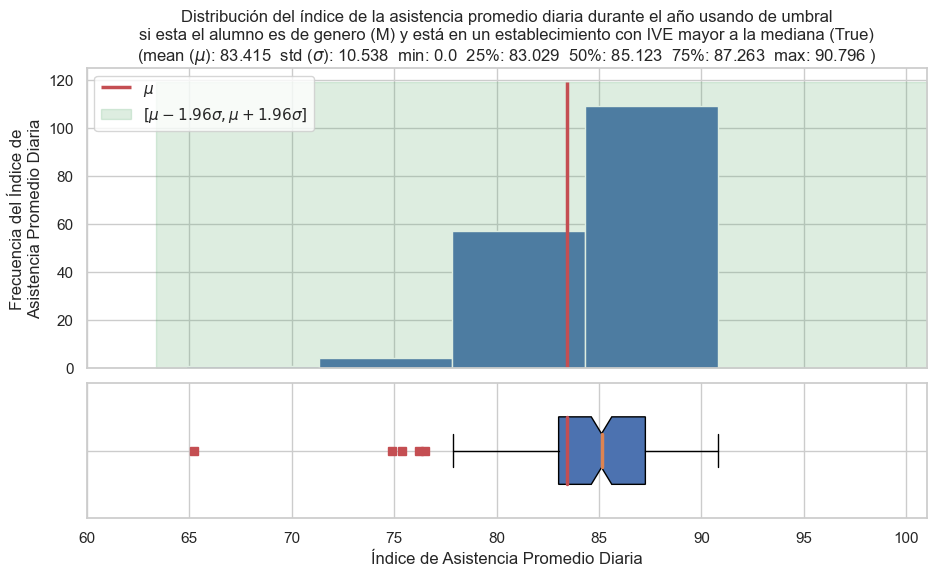

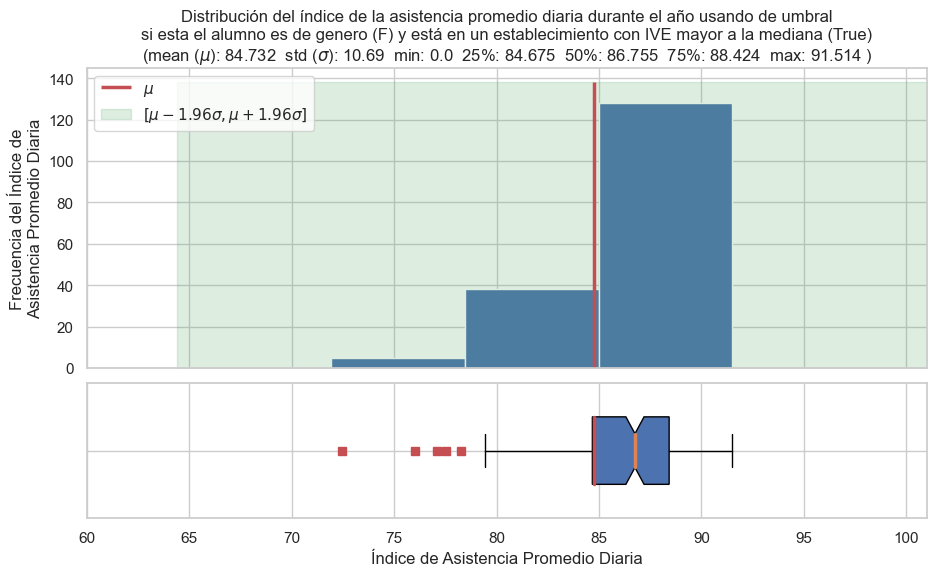

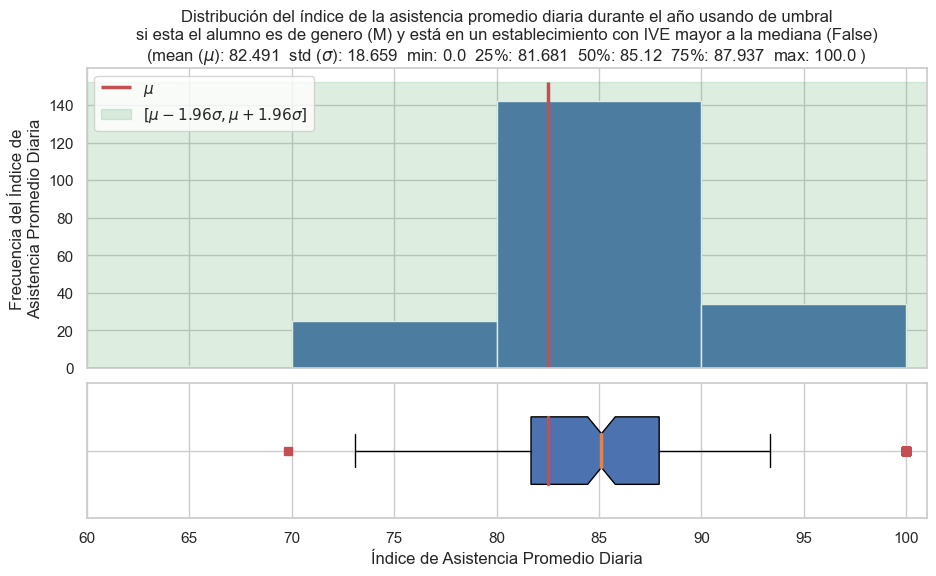

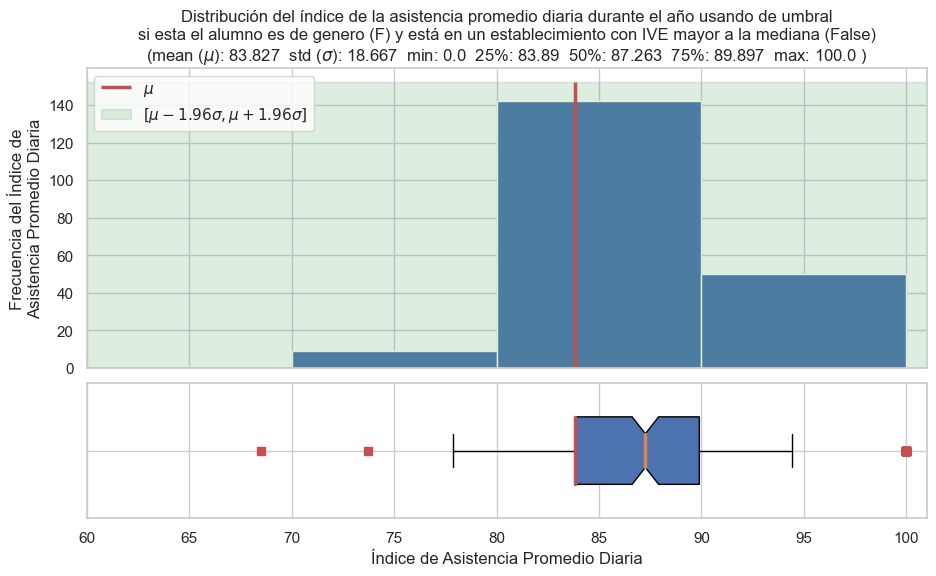

In [35]:
for cat1 in [True,False]:
    
    for cat2 in ["M","F"]:

        fig, ax = plt.subplots(nrows=2,
                               figsize=(12,5),
                               sharex=True)


        aux = df_all.assign(sobre_mediana_ive=lambda x: x["IVE-SINAE BÁSICA 2022"]>=mediana_ive)
        aux = aux[(aux["sobre_mediana_ive"]==cat1) & (aux["genero"] == cat2)][list_fechas]
        aux = aux[(aux[list_fechas]>=0)].describe().T
        aux = aux[aux["count"]>0]
        aux = aux["mean"]*100
        metadata = aux.describe()

        prom = metadata["mean"]
        des = metadata["std"]
        mediana = metadata["50%"]


        str_stats = []
        for key,value in metadata[list(metadata.index[1:])].to_dict().items():
            if key == "mean":
                str_stats.append(f"{key} ($\mu$):")
            elif key == "std":
                str_stats.append(f"{key} ($\sigma$):")
            else:
                str_stats.append(f"{key}:")
            str_stats.append(f"{round(value,3)} ")

        str_stats = " ".join(str_stats)

        ax[0].set_title(f"Distribución del índice de la asistencia promedio diaria durante el año usando de umbral\nsi esta el alumno es de genero ({cat2}) y está en un establecimiento con IVE mayor a la mediana ({cat1})\n({str_stats})")
        ax[0].set_ylabel("Frecuencia del Índice de\nAsistencia Promedio Diaria")
        ax[0].set_position([0.2,0.4,0.7,0.6])
        ax[1].set_xlabel("Índice de Asistencia Promedio Diaria")
        ax[1].set_position([0.2,0.1,0.7,0.27])
        ax[0].set_xlim(left=60,right=101)

        w, b = np.histogram(aux,bins="scott")

        top = max(w) +10

        ax[0].hist(x=b[:-1],bins=b,weights=w)
        ax[0].vlines(x=prom,
                     ymin=0,
                     ymax=top,
                     color="r",
                     label=f"$\mu$",
                     linewidth=2.5)

        ax[0].fill_betweenx(y=range(top+1),
                            x1=prom-1.9*des,
                            x2=prom+1.9*des,
                            color="g",
                            alpha=0.2,
                            label=f"$[\mu- 1.96\sigma, \mu + 1.96\sigma]$")


        ax[0].legend(loc='upper left')

        ax[1].boxplot(aux,
                      notch=True,
                      vert=False,
                      sym="rs",
                      widths=0.5,
                      patch_artist=True,
                      medianprops= dict(linewidth=2.5),
                      showmeans=True,
                      meanline=True,
                      meanprops= dict(linestyle="-",linewidth=2.5,color="r"),
                      labels=[""])

        plt.show()

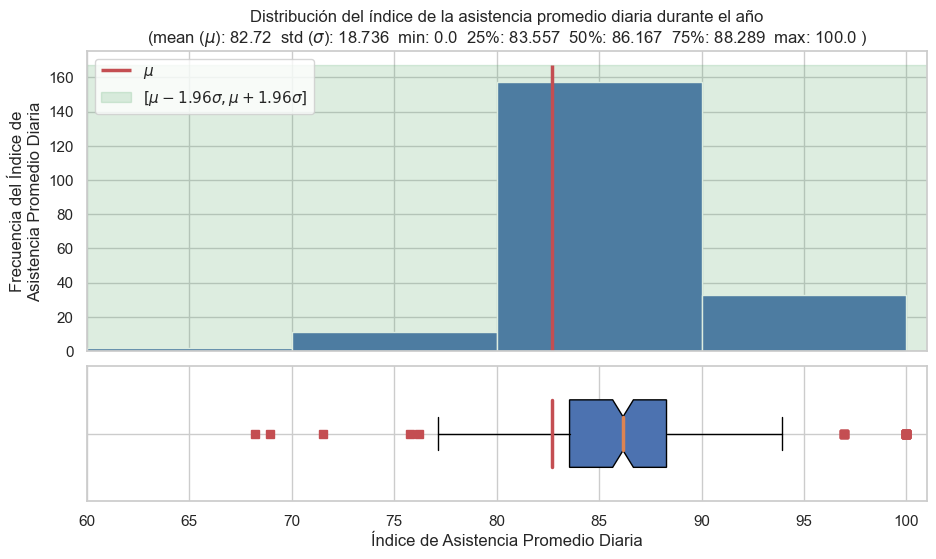

In [37]:

fig, ax = plt.subplots(nrows=2,
                       figsize=(12,5),
                       sharex=True)
aux = df_all[df_all[list_fechas]>=0].describe().T
aux = aux[aux["count"]>0]
aux = aux["mean"]*100
metadata = aux.describe()

prom = metadata["mean"]
des = metadata["std"]
mediana = metadata["50%"]


str_stats = []
for key,value in metadata[list(metadata.index[1:])].to_dict().items():
    if key == "mean":
        str_stats.append(f"{key} ($\mu$):")
    elif key == "std":
        str_stats.append(f"{key} ($\sigma$):")
    else:
        str_stats.append(f"{key}:")
    str_stats.append(f"{round(value,3)} ")

str_stats = " ".join(str_stats)

ax[0].set_title(f"Distribución del índice de la asistencia promedio diaria durante el año\n({str_stats})")
ax[0].set_ylabel("Frecuencia del Índice de\nAsistencia Promedio Diaria")
ax[0].set_position([0.2,0.4,0.7,0.6])
ax[0].set_xlim(left=60,right=101)
ax[1].set_xlabel("Índice de Asistencia Promedio Diaria")
ax[1].set_position([0.2,0.1,0.7,0.27])

w, b = np.histogram(aux,bins="scott")

top = max(w) +10

ax[0].hist(x=b[:-1],bins=b,weights=w)
ax[0].vlines(x=prom,
             ymin=0,
             ymax=top,
             color="r",
             label=f"$\mu$",
             linewidth=2.5)

ax[0].fill_betweenx(y=range(top+1),
                    x1=prom-1.9*des,
                    x2=prom+1.9*des,
                    color="g",
                    alpha=0.2,
                    label=f"$[\mu- 1.96\sigma, \mu + 1.96\sigma]$")


ax[0].legend(loc='upper left')

ax[1].boxplot(aux,
              notch=True,
              vert=False,
              sym="rs",
              widths=0.5,
              patch_artist=True,
              medianprops= dict(linewidth=2.5),
              showmeans=True,
              meanline=True,
              meanprops= dict(linestyle="-",linewidth=2.5,color="r"),
              labels=[""])

plt.show()

### Graficos de Series de Tiempo

## Gráficos Personalizados

In [38]:
def extract_dias_no_trabajados(df:pd.DataFrame)->list:
    extract = []
    for fecha in df.iloc:
        aux = fecha.values[fecha.values>=-1]
        if -1 in aux:
            if len(set(aux.tolist())) == 1:
                extract.append(2)
            else:
                extract.append(1)
        else:
            extract.append(0)
    return np.array(extract)      

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

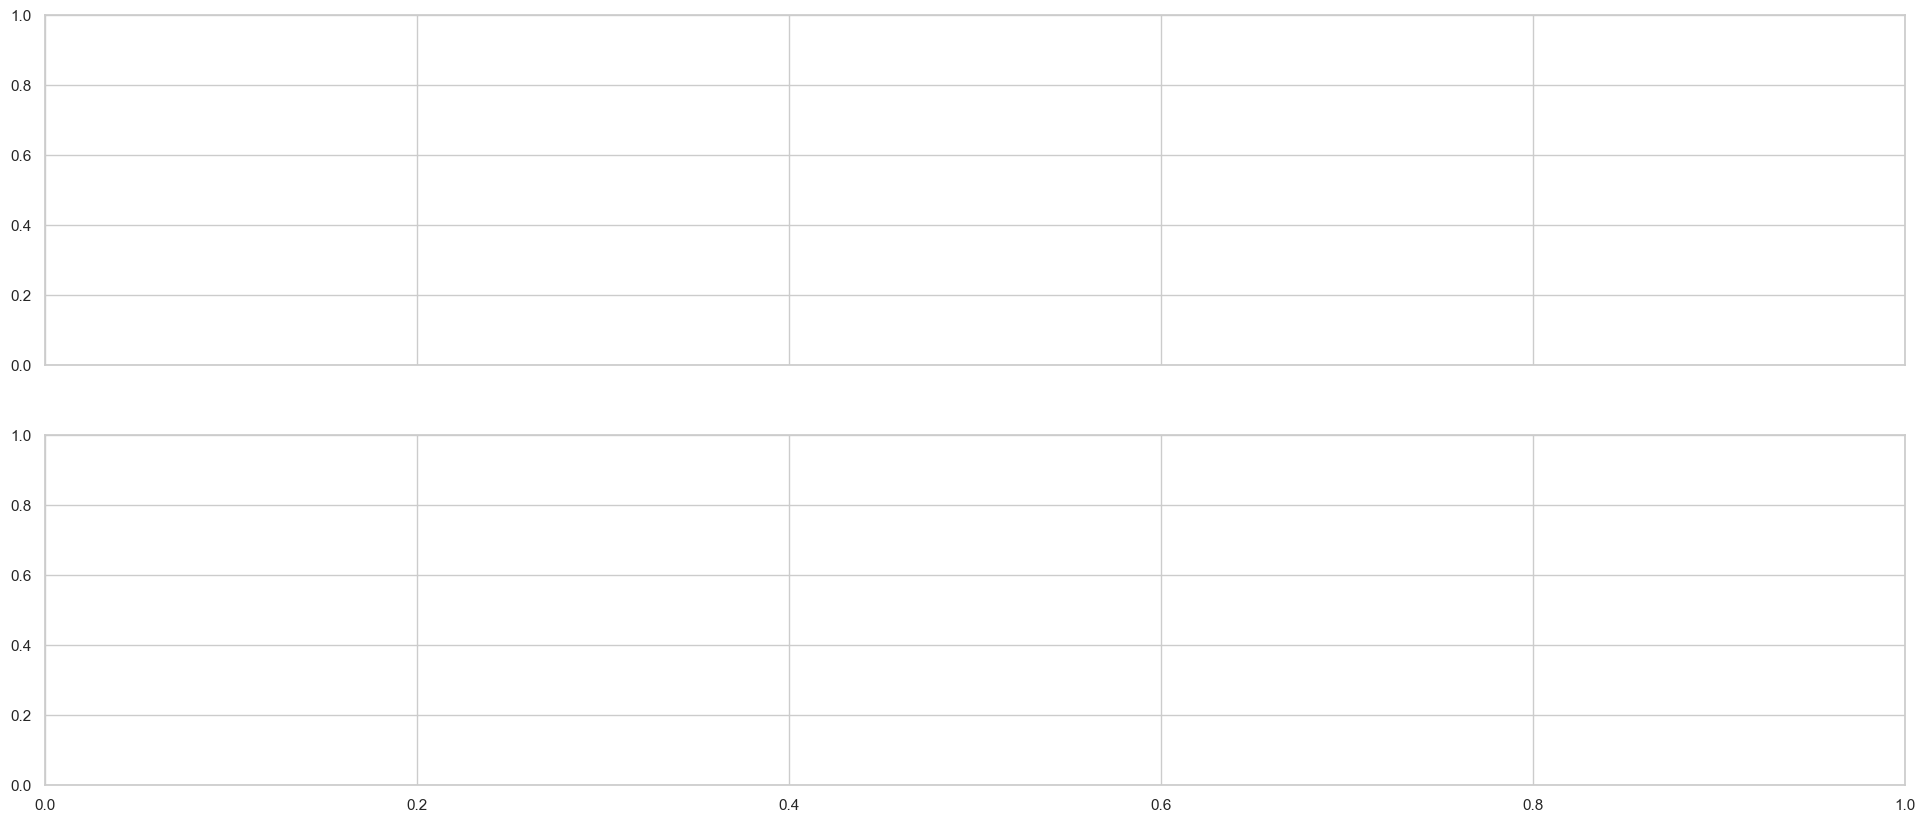

In [41]:
top =140

## Need
for i in range(3,12):
        x_plot = df_all.columns[df_all.columns.map(lambda x: x.split()[0]==i or x.split()[0][1]==i)]
        where_filter = extract_dias_no_trabajados(df_all[x_plot].T)

        fig, ax = plt.subplots(nrows=2,
                               figsize=(24,10),
                               sharex=True)


        ## Settings data
        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==2,
                        color="r",
                        alpha=0.5,
                        label="NT por todos")

        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==1,
                        color="y",
                        alpha=0.5,
                        label="NT por algunos")


        ax[0].set_xlim(left=datetime.datetime(2022, i, 1)- 12*datetime.timedelta(seconds=3600),right=datetime.datetime(2022, i, PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]) + 12*datetime.timedelta(seconds=3600))
        ax[0].set_ylim(bottom=0, top=top)
        ax[0].set_title(f"Porcentaje de la asistencia promedio durante el mes de {PARSE_INT_TO_MONTH[i-1]}")
        ax[0].set_ylabel("Porcentaje de Asistencia Promedio (%)")
        ax[0].set_position([0.2,0.4,0.7,0.6])
        ax[0].set_xticks(ticks=x_plot,labels=range(1,PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]+1), minor=False)


        ax[1].set_title(f"Desviación estándar del porcentaje")
        ax[1].set_ylabel("Desviación Estándar")
        ax[1].set_xlabel("Día")
        ax[1].set_ylim(bottom=0, top=60)
        ax[1].set_position([0.2,0.1,0.7,0.27])



        for j, cat in enumerate(["M","F"]):
            df_aux = df.merge(right=df_alumnos[df_alumnos["genero"]==cat],on="usuario_id")[list(x_plot)]
            stats_for_dates = df_aux[df_aux>=0].describe().T[(df_aux[df_aux>=0].describe().T)["count"]>0]
            y_std = stats_for_dates["std"]
            y_mean = stats_for_dates["mean"]

            ax[0].errorbar(x=stats_for_dates.index,
                    y=100*y_mean,
                    yerr=100*y_std,
                    fmt="o",
                    alpha=.6,
                    label = cat)

            ax[1].bar(x=stats_for_dates.index+(2*j-1)*datetime.timedelta(seconds=4.2*3600),
                  height=100*y_std,
                  width=0.35,
                  label=cat)

        ax[0].legend(loc='upper right')
        ax[1].legend(loc='upper right')
        ## Plot

        plt.show()

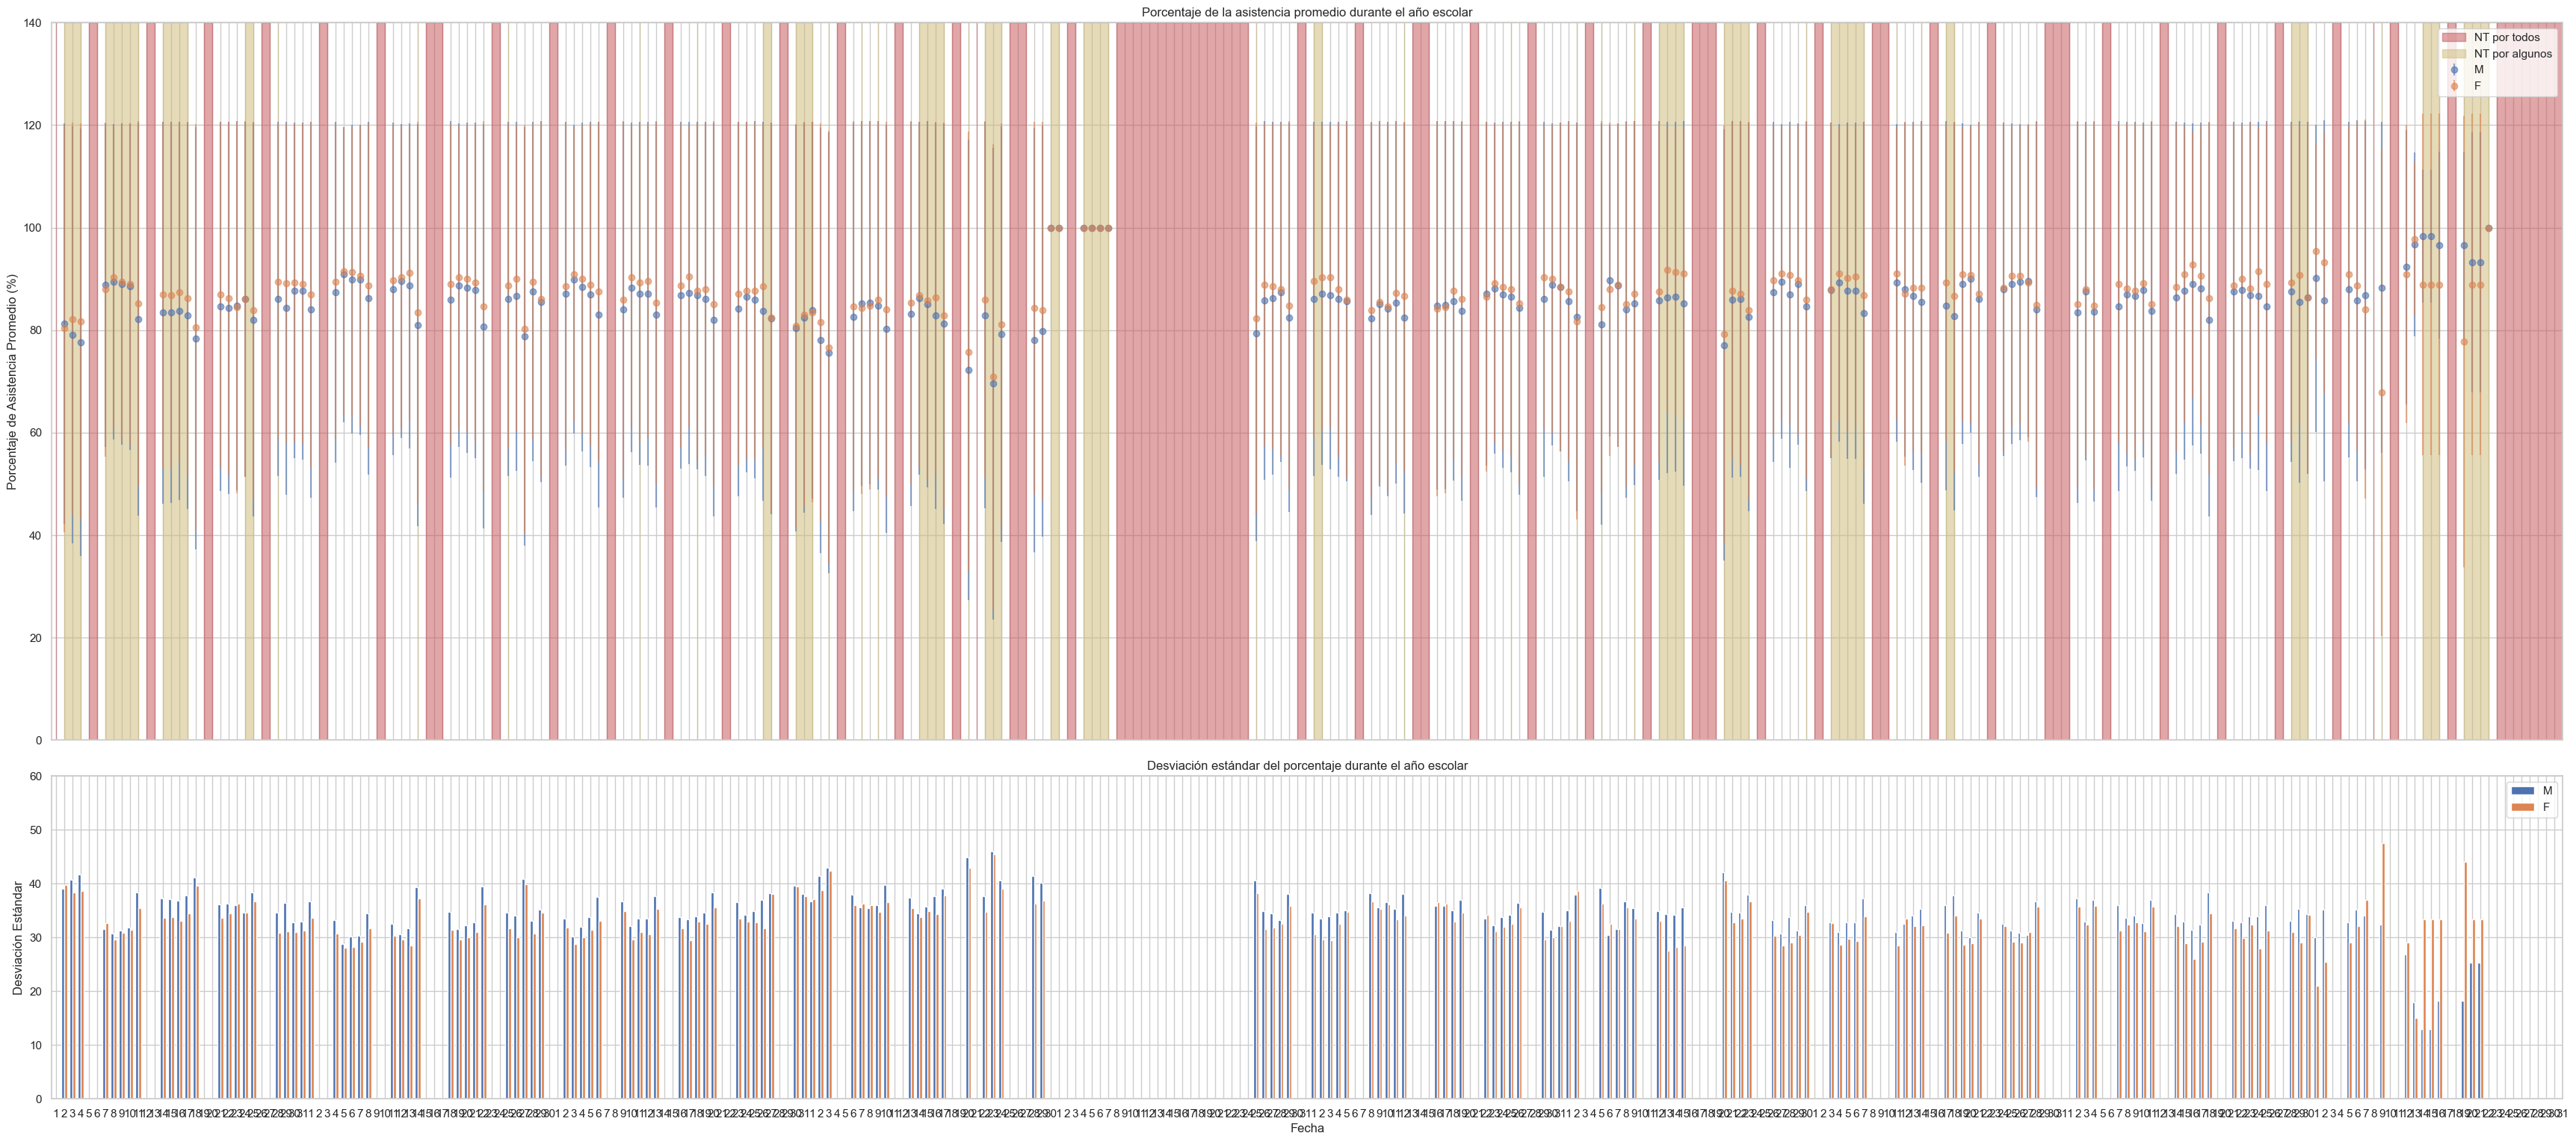

In [ ]:
top =140
## Need
x_plot = df.columns
where_filter = extract_dias_no_trabajados(df[x_plot].T)
fig, ax = plt.subplots(nrows=2,
                       figsize=(48,16),
                       sharex=True)
## Settings data
ax[0].fill_between(x=x_plot,
                y1=top,
                where=where_filter==2,
                color="r",
                alpha=0.5,
                label="NT por todos")
ax[0].fill_between(x=x_plot,
                y1=top,
                where=where_filter==1,
                color="y",
                alpha=0.5,
                label="NT por algunos")
ax[0].set_xlim(left=datetime.datetime(2022, 3, 1)- 12*datetime.timedelta(seconds=3600),right=datetime.datetime(2022, 11, 30) + 12*datetime.timedelta(seconds=3600))
ax[0].set_ylim(bottom=0, top=top)
ax[0].set_title(f"Porcentaje de la asistencia promedio durante el año escolar")
ax[0].set_ylabel("Porcentaje de Asistencia Promedio (%)")
ax[0].set_position([0.2,0.4,0.7,0.6])
ax[0].set_xticks(ticks=x_plot,labels=list(map(lambda x: x.day,list(pd.date_range(datetime.datetime(2022,3,1),datetime.datetime(2022,12,31))))), minor=False)
ax[1].set_title(f"Desviación estándar del porcentaje durante el año escolar")
ax[1].set_ylabel("Desviación Estándar")
ax[1].set_xlabel("Fecha")
ax[1].set_ylim(bottom=0, top=60)
ax[1].set_position([0.2,0.1,0.7,0.27])
for j, cat in enumerate(["M","F"]):
    df_aux = df.merge(right=df_alumnos[df_alumnos["genero"]==cat],on="usuario_id")[list(x_plot)]
    stats_for_dates = df_aux[df_aux>=0].describe().T[(df_aux[df_aux>=0].describe().T)["count"]>0]
    y_std = stats_for_dates["std"]
    y_mean = stats_for_dates["mean"]
    ax[0].errorbar(x=stats_for_dates.index,
            y=100*y_mean,
            yerr=100*y_std,
            fmt="o",
            alpha=.6,
            label = cat)
    ax[1].bar(x=stats_for_dates.index+(2*j-1)*datetime.timedelta(seconds=4.2*3600),
          height=y_std*100,
          width=0.35,
          label=cat)
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
## Plot
plt.show()

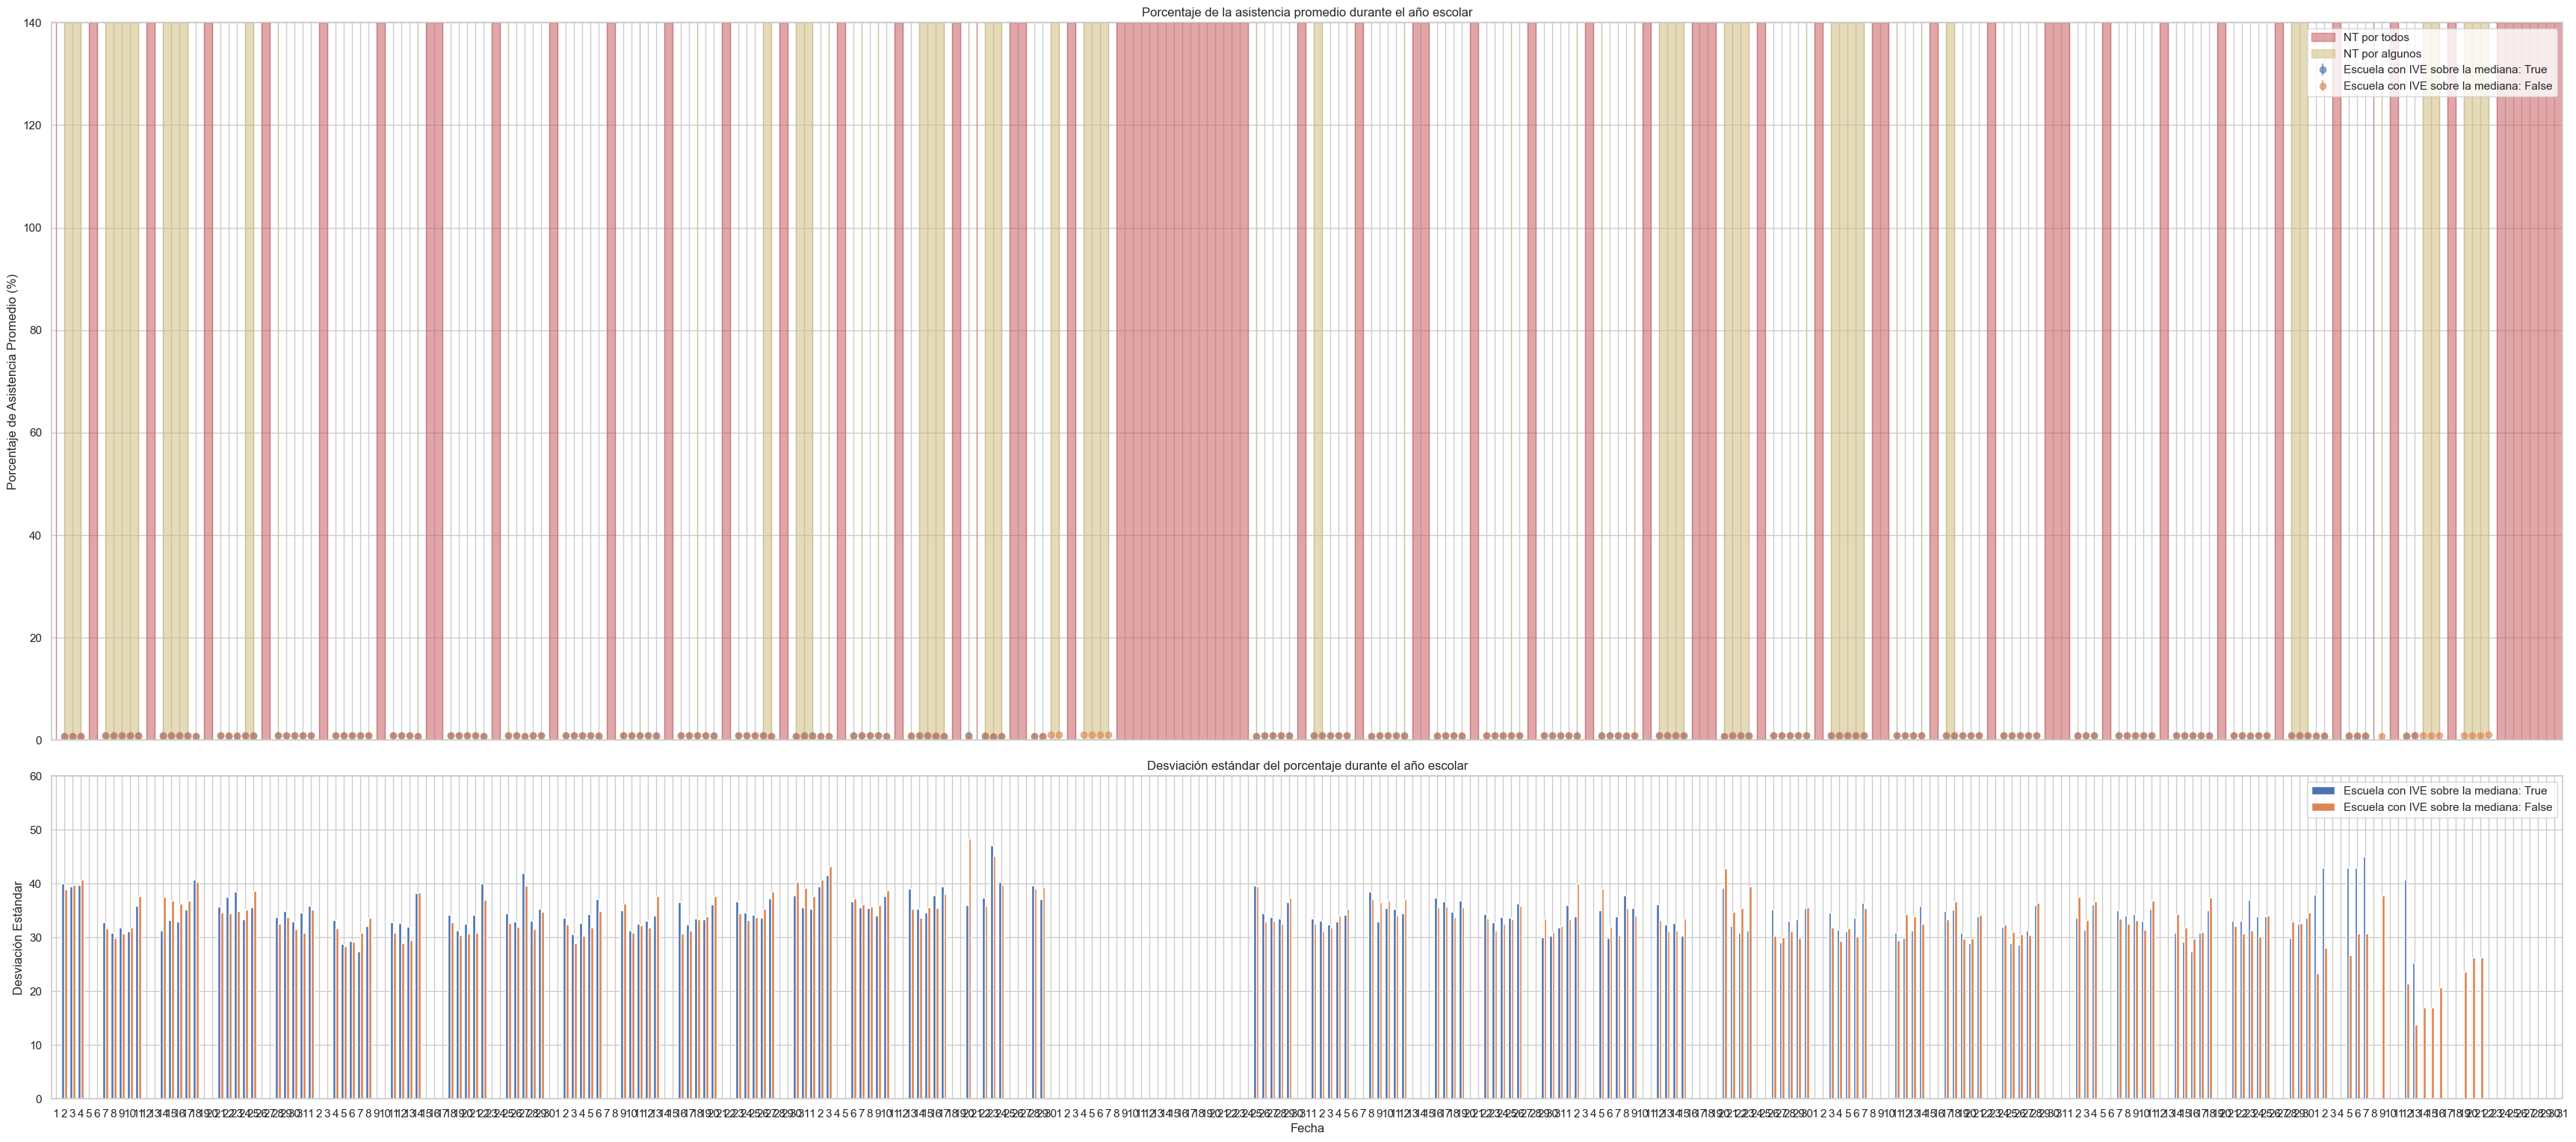

In [ ]:
top=140
## Need
x_plot = df.columns
where_filter = extract_dias_no_trabajados(df[x_plot].T)
median_ive = df_ive["IVE-SINAE BÁSICA 2022"].median()
fig, ax = plt.subplots(nrows=2,
                       figsize=(48,16),
                       sharex=True)
## Settings data
ax[0].fill_between(x=x_plot,
                y1=top,
                where=where_filter==2,
                color="r",
                alpha=0.5,
                label="NT por todos")
ax[0].fill_between(x=x_plot,
                y1=top,
                where=where_filter==1,
                color="y",
                alpha=0.5,
                label="NT por algunos")
ax[0].set_xlim(left=datetime.datetime(2022, 3, 1)- 12*datetime.timedelta(seconds=3600),right=datetime.datetime(2022, 11, 30) + 12*datetime.timedelta(seconds=3600))
ax[0].set_ylim(bottom=0, top=top)
ax[0].set_title(f"Porcentaje de la asistencia promedio durante el año escolar")
ax[0].set_ylabel("Porcentaje de Asistencia Promedio (%)")
ax[0].set_position([0.2,0.4,0.7,0.6])
ax[1].set_title(f"Desviación estándar del porcentaje durante el año escolar")
ax[1].set_ylabel("Desviación Estándar")
ax[1].set_xlabel("Fecha")
ax[1].set_ylim(bottom=0, top=60)
ax[1].set_position([0.2,0.1,0.7,0.27])
ax[0].set_xticks(ticks=x_plot,labels=list(map(lambda x: x.day,list(pd.date_range(datetime.datetime(2022,3,1),datetime.datetime(2022,12,31))))), minor=False)

for j, cat in enumerate([True,False]):
    df_aux = df.merge(df_alumnos[["rbd","genero","usuario_id"]],on="usuario_id")
    df_aux = df_aux.merge(right=df_ive,left_on="rbd",right_on="ID_RBD").assign(sobre_mediana=lambda x: x["IVE-SINAE BÁSICA 2022"]>=median_ive)    
    df_aux = df_aux[df_aux["sobre_mediana"]==cat][list(x_plot)]
    stats_for_dates = df_aux[df_aux>=0].describe().T[(df_aux[df_aux>=0].describe().T)["count"]>0]
    y_std = stats_for_dates["std"]
    y_mean = stats_for_dates["mean"]
    ax[0].errorbar(x=stats_for_dates.index,
            y=y_mean,
            yerr=1*y_std,
            fmt="o",
            alpha=.6,
            label = f"Escuela con IVE sobre la mediana: {cat}")
    ax[1].bar(x=stats_for_dates.index+(2*j-1)*datetime.timedelta(seconds=4.2*3600),
          height=y_std*100,
          width=0.35,
          label=f"Escuela con IVE sobre la mediana: {cat}")
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
## Plot
plt.show()

In [40]:
top = 140

## Need
for i in range(3,12):
        x_plot = df.columns[df.columns.map(lambda x: x.split()[0]==i or x.split()[0][1]==i)]
        where_filter = extract_dias_no_trabajados(df[x_plot].T)
        median_ive = df_ive["IVE-SINAE BÁSICA 2022"].median()
        
        fig, ax = plt.subplots(nrows=2,
                               figsize=(18,7.5),
                               sharex=True)


        ## Settings data
        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==2,
                        color="r",
                        alpha=0.5,
                        label="NT por todos")

        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==1,
                        color="y",
                        alpha=0.5,
                        label="NT por algunos")


        ax[0].set_xlim(left=datetime.datetime(2022, i, 1)- 12*datetime.timedelta(seconds=3600),right=datetime.datetime(2022, i, PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]) + 12*datetime.timedelta(seconds=3600))
        ax[0].set_ylim(bottom=0, top=top)
        ax[0].set_title(f"Porcentaje de la asistencia promedio diaria durante el mes de {PARSE_INT_TO_MONTH[i-1]} del 2022")
        ax[0].set_ylabel("Porcentaje de Asistencia Promedio (%")
        ax[0].set_position([0.2,0.4,0.7,0.6])
        ax[0].grid(True,"both","both")
        ax[0].set_xticks(ticks=x_plot,labels=range(1,PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]+1), minor=False)

        ax[1].set_title(f"Desviación estándar del Porcentaje")
        ax[1].set_ylabel("Desviación Estándar")
        ax[1].set_xlabel("Fecha")
        ax[1].set_ylim(bottom=0, top=60)
        ax[1].set_position([0.2,0.1,0.7,0.27])
        ax[1].grid(True,"both","both")


        for j, cat in enumerate([True,False]):
            df_aux = df.merge(df_alumnos[["rbd","genero","usuario_id"]],on="usuario_id")
            df_aux = df_aux.merge(right=df_ive,left_on="rbd",right_on="ID_RBD").assign(sobre_mediana=lambda x: x["IVE-SINAE BÁSICA 2022"]>=median_ive)    
            df_aux = df_aux[df_aux["sobre_mediana"]==cat][list(x_plot)]
            stats_for_dates = df_aux[df_aux>=0].describe().T[(df_aux[df_aux>=0].describe().T)["count"]>0]
            y_std = stats_for_dates["std"]
            y_mean = stats_for_dates["mean"]

            ax[0].errorbar(x=stats_for_dates.index,
                    y=100*y_mean,
                    yerr=100*y_std,
                    fmt="o",
                    alpha=.6,
                    label = f"Escuela con IVE sobre la mediana: {cat}")

            ax[1].bar(x=stats_for_dates.index+(2*j-1)*datetime.timedelta(seconds=4.2*3600),
                  height=y_std*100,
                  width=0.35,
                  label = f"Escuela con IVE sobre la mediana: {cat}")

        ax[0].legend(loc='upper right')
        ax[1].legend(loc='upper right')
        ## Plot
        
        plt.show()

NameError: name 'df' is not defined

In [ ]:
top = 140

## Need
for i in range(3,12):
        x_plot = df.columns[df.columns.map(lambda x: x.month==i)]
        where_filter = extract_dias_no_trabajados(df[x_plot].T)
        median_ive = df_ive["IVE-SINAE BÁSICA 2022"].median()
        
        fig, ax = plt.subplots(nrows=2,
                               figsize=(32,16),
                               sharex=True)


        ## Settings data
        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==2,
                        color="r",
                        alpha=0.5,
                        label="NT por todos")

        ax[0].fill_between(x=x_plot,
                        y1=top,
                        where=where_filter==1,
                        color="y",
                        alpha=0.5,
                        label="NT por algunos")


        ax[0].set_xlim(left=datetime.datetime(2022, i, 1)- 12*datetime.timedelta(seconds=3600),right=datetime.datetime(2022, i, PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]) + 12*datetime.timedelta(seconds=3600))
        ax[0].set_ylim(bottom=0, top=top)
        ax[0].set_title(f"Asistencia promedio durante el mes de {PARSE_INT_TO_MONTH[i-1]}")
        ax[0].set_ylabel("Porcentaje Asistencia Promedio (%)")
        ax[0].set_position([0.2,0.4,0.7,0.6])
        ax[0].set_xticks(ticks=x_plot,labels=range(1,PARSE_STR_MONTH_TO_DATA[PARSE_INT_TO_MONTH[i-1]][1]+1), minor=False)

        ax[1].set_title(f"Desviación estándar del porcentaje durante el mes de {PARSE_INT_TO_MONTH[i-1]}")
        ax[1].set_ylabel("Desviación Estándar")
        ax[1].set_xlabel("Fecha")
        ax[1].set_ylim(bottom=0, top=60)
        ax[1].set_position([0.2,0.1,0.7,0.27])



        for k, cat1 in enumerate(["M","F"]):   
            for j, cat2 in enumerate([True,False]):
                df_aux = df.merge(df_alumnos[["rbd","genero","usuario_id"]],on="usuario_id")
                df_aux = df_aux[df_aux["genero"]==cat1] 
                df_aux = df_aux.merge(right=df_ive[["IVE-SINAE BÁSICA 2022","ID_RBD"]],left_on="rbd",right_on="ID_RBD").assign(sobre_mediana=lambda x: x["IVE-SINAE BÁSICA 2022"]>=median_ive)
                df_aux = df_aux[df_aux["sobre_mediana"]==cat2][list(x_plot)]
                stats_for_dates = df_aux[df_aux>=0].describe().T[(df_aux[df_aux>=0].describe().T)["count"]>0]
                y_std = stats_for_dates["std"]
                y_mean = stats_for_dates["mean"]

                ax[0].errorbar(x=stats_for_dates.index,
                        y=y_mean*100,
                        yerr=100*y_std,
                        fmt="o",
                        alpha=.7,
                        label = f"Escuela con IVE sobre la mediana: {cat2}\n Genero: {cat1}")

                ax[1].bar(x=stats_for_dates.index+(0.5*(j+2*k)-1)*datetime.timedelta(seconds=8*3600),
                      height=y_std*100,
                      width=0.15,
                      label = f"Escuela con IVE sobre la mediana: {cat2}\n Genero: {cat1}")

        ax[0].legend(loc='lower right')
        ax[1].legend(loc='upper right')
        ## Plot

        plt.show()

AttributeError: 'str' object has no attribute 'month'